In [1]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation
import matplotlib.colors as mcolors
import math
import os
import sys
import multiprocessing
import time
import yt
import SolitonMY

## Master equations: SP or GPP




The scaling symmetry of GPP eq.:
\begin{equation}
\big\{ t, \mathbf{r}, \psi, \Phi, g \big\} 
\rightarrow
\big\{ \lambda^{-2} t, \lambda^{-1} \mathbf{r}, \lambda^{2} \psi, \lambda^{2} \Phi, \lambda^{-2} g \big\}
\end{equation}


We take
\begin{equation}
t = \tilde{t}/(\mu v_0^2) ,
\quad
\mathbf{x} = \tilde{\mathbf{x}} /(\mu v_0) ,
\quad
\Phi = \tilde{\Phi} v_0^2 ,
\quad
\psi = v_0^2 \tilde{\psi} \sqrt{\mu/(4 \pi G)}
\quad
g = \tilde{g} 4\pi G/v_0^2
\end{equation}
Then, the CFL condition
\begin{equation}
\Delta t \leq \max\left[ {\mu \over 6 \hbar} \Delta x^2, {\hbar \over \mu |V|_\text{max} } \right]
\end{equation}
gives
\begin{equation}
\Delta\tilde{t} \leq \max\left[ {\Delta \tilde{x}^2 \over 6 \hbar} , {\hbar \over |\tilde{\Phi}|_\text{max} } \right] ~.
\end{equation}

The rescaled SP equations:
\begin{align}
\mathrm{i} { \partial \over \partial \tilde{t}} \tilde{\psi}
&=
- {1 \over 2} \tilde{\nabla}^2 \tilde{\psi}
+ \tilde{g} |\tilde{\psi}|^2 \tilde{\psi}
+ \tilde{\Phi} \tilde{\psi} ,
\\
\tilde{\nabla}^2 \tilde{\Phi} &= ( |\tilde{\psi}|^2 - \tilde{n}_0 ) ,
\end{align}


The explicit values are given by
\begin{align*}
\tilde{t} &= \lambda^{-2} (\mu v_0^2) t
\simeq 
7.35 \times 10^{3} \left( {t \over 13.8 \text{ Gyr}} \right) \left( { \mu \over 10^{-22} \text{ eV}} \right) \left( {v_0 \over 100 \text{ km/s}} \right)^2 ,
\\
\tilde{\mathbf{x}} &= \lambda^{-1} (\mu v_0) \mathbf{x}
\simeq
5.2 \times \left( {\mathbf{x} \over 1 \text{ kpc}} \right) \left( { \mu \over 10^{-22} \text{ eV}} \right) \left( {v_0 \over 100 \text{ km/s}} \right) ,
\\
\tilde{\Phi} &= \lambda^2 v_0^{-2} \Phi
\simeq
9 \times \left(  { \Phi \over 10^{-6} } \right) \left( {v_0 \over 100 \text{ km/s}} \right)^{-2} ,
\\
\tilde{\psi} &= \lambda^2 v_0^{-2} \mu^{-1/2} (4 \pi G)^{1/2} \psi
\simeq
2.3 \times
\left( { \psi \over 10^{17} \text{ cm}^{-3/2} } \right) \left( { \mu \over 10^{-22} \text{ eV}} \right)^{-1/2} \left( {v_0 \over 100 \text{ km/s}} \right)^{-2} ,
\\
\tilde{g} &= \lambda^{-2} (4 \pi G)^{-1} v_0^2 g
\simeq
- 1.32 \times 10
\left( {g \over 10^{-36} \text{ GeV}^{-2} } \right) \left( {v_0 \over 100 \text{ km/s}} \right)^{2} ,
\\
\tilde{n} &= \lambda^{4} {4 \pi G \over \mu v_0^4} n
\simeq 
5.3 \times 10^{2}
\left( { n \over 10^{36} \text{ cm}^{-3} } \right) \left( { \mu \over 10^{-22} \text{ eV}} \right)^{-1} \left( {v_0 \over 100 \text{ km/s}} \right)^{-4} ,
\\
\tilde{N} &= \lambda {4 \pi G \mu^2 \over v_0} N
\simeq
2.52 \times 10^{4}
\left( { N \over 10^{100} } \right) \left( { \mu \over 10^{-22} \text{ eV}} \right)^{2} \left( {v_0 \over 100 \text{ km/s}} \right)^{-1} .
\end{align*}

## Construct initial fluctuations: Gaussian

averaged number density (input) = 0.125
averaged number density (output) = 0.1249999999999881
total number of bosons (output) = 999.9999999999048
jeanslength = 7.472008672178699


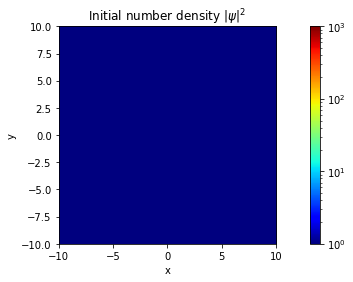

/home/chaochen/Axion/Soliton/SolitonMY.py:399: RuntimeWarning: divide by zero encountered in true_divide
  grav_k = np.divide(- rhon_k,  ksq)
/home/chaochen/Axion/Soliton/SolitonMY.py:399: RuntimeWarning: invalid value encountered in true_divide
  grav_k = np.divide(- rhon_k,  ksq)


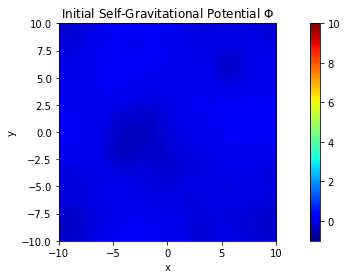

In [2]:
#-----------------------intial Guassian distribution--------------------------------------

resol = 128   #the number of grids on each side in the real space
length = 20   #the normalized length of each side in the real space
Ntot = 1000.0 #the normalized total number of bosons: N = number density * length**3

#loop calculation
actual_num_steps = 6000 #total time step
save_num = 60 #save file once every 60 timestep
ini_psi_plot=True
ini_grav_plot=True
loop_initiate=False

SolitonMY.soliton_formaiton(resol, length, Ntot, 
                             ini_psi_plot, ini_grav_plot, 
                             loop_initiate, actual_num_steps, save_num)

## Loop for computation: pesudo spectral method

In [ ]:
#os.mkdir("soliton_data")

start_time = time.time()
#--------------------------------loop--------------------------------------------------------------------
Soliton_MY.soliton_formaiton(resol=resol, length=length, Ntot=Ntot, 
                             ini_psi_plot=True, ini_grav_plot=True, 
                             loop_initiate=False, actual_num_steps=actual_num_steps, save_num=save_num)

print("--- %s seconds ---" % (time.time() - start_time) )

the renormalized time step = 0.013020833333333334


<ipython-input-4-7b03cfa4acbb>:18: RuntimeWarning: divide by zero encountered in true_divide
  grav_k = np.divide(-rho_k,  ksq)
<ipython-input-4-7b03cfa4acbb>:18: RuntimeWarning: invalid value encountered in true_divide
  grav_k = np.divide(-rho_k,  ksq)


--- 33.76771402359009 seconds ---


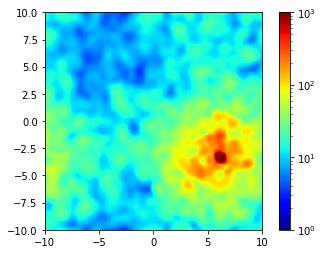

In [7]:
start_time = time.time()

# Define the meta data for the movie
FFMpegWriter = matplotlib.animation.writers['ffmpeg']
metadata = dict(title='Renormalized Nnumber Density', artist='ChaoChen',comment='soliton')
writer = FFMpegWriter(fps= 5, metadata=metadata, bitrate= 300)
    

# Initialize the movie
plt.ioff()
fig = plt.figure()

data2d = []
for ix in range(actual_num_steps):
    if (ix%60==0):
        file_name = "psi_#{}.npy".format(ix,'npy')
        data = np.load(os.path.join('soliton_data', file_name)) # which is psi
        temp2d = (np.real(np.abs(data)**2)).sum(2) # sum |psi|^2 along z axis
        data2d.append(temp2d)    

#----------------------------------------------2d-------------------------------------
def animate2d(i):
    plt.clf()
    plot = plt.imshow(data2d[i], cmap="jet", 
                               interpolation="nearest", origin="lower", norm=matplotlib.colors.LogNorm(1e+0,1e+3),
                               extent=[-length/2.0, length/2.0, -length/2.0, length/2.0])
    plt.colorbar()
    
# Update the frames for the movie
with writer.saving(fig, "Soliton_2d.mp4", 200):
    for ix in range(len(data2d)):
        animate2d(ix)
        writer.grab_frame()


print("--- %s seconds ---" % (time.time() - start_time) )



#--------------------------------------------------------------------------------------
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls> 
      <source src="Soliton_2d.mp4" type="video/mp4">
</video></div>""")

the maximum value: 4699.718642665076 4699.718642665076
the maximum postion: (85, 206)
distance function is well-defined


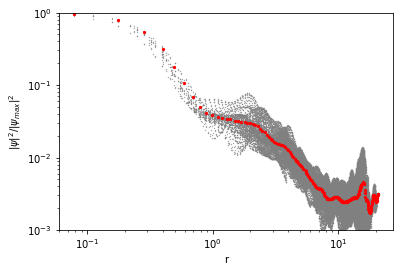

In [15]:
# profile of the formed soliton

file_name = "psi_#{}.npy".format(5940,'npy')
data = np.load(os.path.join('soliton_data', file_name)) # load psi data
rho_data = (np.real(np.abs(data)**2)).sum(2) # sum along z axis
max_val = np.max( rho_data ) # max of |psi|^2
max_pos = np.unravel_index( np.argmax( rho_data ), rho_data.shape ) # max position
print("the maximum value:",rho_data[max_pos],rho_data[max_pos])
print("the maximum postion:",max_pos)

norm_data = rho_data/rho_data[max_pos] # normalize data using max

#-----------------define distance function for 2d--------------------------
x_2d, y_2d = np.meshgrid(grid_vec, grid_vec, sparse=False, indexing ='ij') #(resol, 1) for x
dist_2d = ( ( x_2d - x_2d[max_pos[0],0] )**2 + ( y_2d - y_2d[0,max_pos[1]] )**2)**0.5 # distance from max position.
if dist_2d[max_pos] ==0.0:
    print("distance function is well-defined")
else:
    print("distance function is incorrect")
    

#---------------------average data points----------------------------------
def ave_func(dist_2d,norm_data,interval):
    dist_x = dist_2d.reshape(resol**2)
    norm_data_y = norm_data.reshape(resol**2) # raw data;
        
    bin_edges = np.arange(np.min(dist_x),np.max(dist_x), interval) # group data points for averaging      
    bin_indices = np.digitize(dist_x, bin_edges) # group indices

    new_x = []
    new_y = []
    for kk in range(1,np.max(bin_indices)+1):
        indices = np.where(bin_indices==kk)[0] # find the corresponding indices of y data
        if len(indices)==0:
            pass
        else:
            yy = np.sum(norm_data_y[indices])/len(indices) # sum up values in a same bin
            xx = dist_x[indices[0]]
            new_y.append(yy)
            new_x.append(xx)
    return new_x, new_y

data_x, data_y = ave_func(dist_2d,norm_data,0.1)

plt.scatter(dist_2d, norm_data, color='grey',s=0.1)
plt.scatter(data_x, data_y, color='red',s=5)
plt.xlabel('r')
plt.ylabel('$|\psi|^2/|\psi_{max}|^2$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1e+0)
plt.show()

In [43]:
# Define the meta data for the movie
FFMpegWriter = matplotlib.animation.writers['ffmpeg']
metadata = dict(title='Renormalized Nnumber Density', artist='ChaoChen',comment='soliton')
writer = FFMpegWriter(fps= 5, metadata=metadata, bitrate= 300)
    

# Initialize the movie
plt.ioff()
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection="3d")

data3d = []
for ix in range(actual_num_steps):
    if (ix%20==0):
        file_name = "psi_#{}.npy".format(ix,'npy')
        data = np.load(os.path.join('soliton_data', file_name)) # which is psi
        temp3d = np.real(np.abs(data)**2) # |psi|^2
        data3d.append(temp3d)    

#----------------------------------------------2d-------------------------------------
def animate3d(i):
    plt.clf()
    ax = fig.add_subplot(111, projection="3d")
    plot = ax.scatter(x, y, z, c=data3d[i], s=0.01, alpha=0.05, marker='o',norm=matplotlib.colors.LogNorm(1e+0, 1e+3),cmap="jet")
    #plt.colorbar()
    
# Update the frames for the movie
with writer.saving(fig, "Soliton_3d.mp4", 200):
    for ix in range( len(data3d) ):
        animate3d(ix)
        writer.grab_frame()

#--------------------------------------------------------------------------------------
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Soliton_3d.mp4" type="video/mp4">
</video></div>""")

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1200x800', '-pix_fmt', 'rgba', '-r', '5', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-b', '300k', '-metadata', 'title=Renormalized Nnumber Density', '-metadata', 'artist=ChaoChen', '-metadata', 'comment=soliton', '-y', 'Soliton_3d.mp4']' returned non-zero exit status 255.

Error in callback <function flush_figures at 0x7f253f4d3dc0> (for post_execute):


KeyboardInterrupt: 

yt : [INFO     ] 2023-05-16 12:51:25,692 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-05-16 12:51:25,692 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-05-16 12:51:25,693 Parameters: domain_left_edge          = [-9. -9. -9.]
yt : [INFO     ] 2023-05-16 12:51:25,694 Parameters: domain_right_edge         = [9. 9. 9.]
yt : [INFO     ] 2023-05-16 12:51:25,695 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-05-16 12:51:25,913 Projection completed
yt : [INFO     ] 2023-05-16 12:51:25,914 xlim = -9.000000 9.000000
yt : [INFO     ] 2023-05-16 12:51:25,914 ylim = -9.000000 9.000000
yt : [INFO     ] 2023-05-16 12:51:25,915 xlim = -9.000000 9.000000
yt : [INFO     ] 2023-05-16 12:51:25,915 ylim = -9.000000 9.000000
yt : [INFO     ] 2023-05-16 12:51:25,919 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



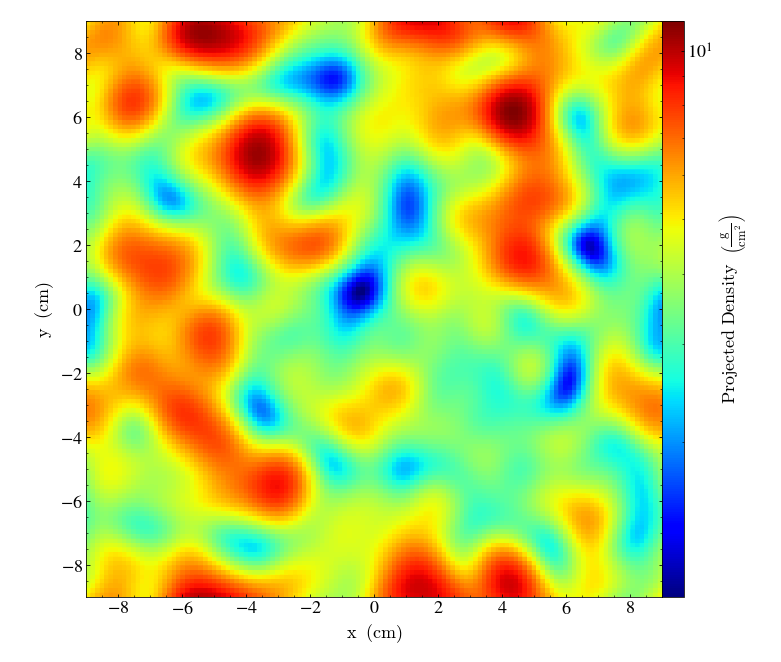

In [114]:
arr = np.load('soliton_data/psi_#1.npy')
rho = np.abs(arr)**2
data_np = dict(density=( rho , ""))

bbox = np.array([[-length/2.0, length/2.0], [-length/2.0, length/2.0], [-length/2.0, length/2.0]])
ds = yt.load_uniform_grid(
    data=data_np, 
    domain_dimensions=arr.shape, 
    bbox = bbox,
    nprocs=32)


slc = yt.ProjectionPlot(ds, "z", ("gas", "density"))
slc.set_cmap(("gas", "density"), "jet")
slc.show()